# YOLO : Overview

Yolo(You only look once) was developed by Josepth Redmon and Ali Farhadi is used for object detection in deep learning.

Yolo is being widely used as it is:

- Light and faster version
- The network understands a generalized object representation meaning the real world image prediction and artwork are fairly     accurate.
- The YOLO object detection is free and opensource

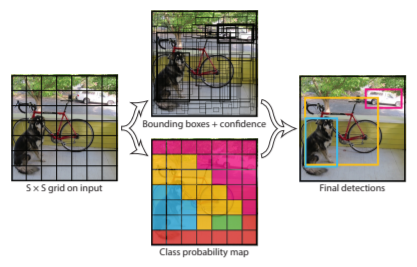

### Versions of YOLO:
    
**YOLO v1**

The first research paper about YOLO was published CVPR May 2016, and it got the OpenCV People’s Choice award. Given below the  talk he has delivered at CVPR. 
>Paper link https://arxiv.org/abs/1506.02640<br>

**YOLO v2**

YOLO v2 (Dec 2016) comes with some improvements from the first version. One of the shortcomings of the first version was, it is not very good at detecting objects that are near to the image and create mistakes in localization. One of the new things introduced in YOLO v2 is anchor boxes.
>Paper link https://arxiv.org/abs/1612.08242

**YOLO v3**

YOLO v3 released in April 2018 which adds further small improvements, included the fact that bounding boxes get predicted at different scales. In this version, the darknet framework expanded to 53 convolution layers.
>Paper link https://pjreddie.com/media/files/papers/YOLOv3.pdf

**YOLO v4**

The YOLO v4 released in April 2020, but this release is not from the YOLO first author. In Feb 2020, Joseph Redmon announced he was leaving the field of computer vision due to concerns regarding the possible negative impact of his works.
>Paper link https://arxiv.org/pdf/1506.02640v5.pdf

Here we focus on YOLO v4
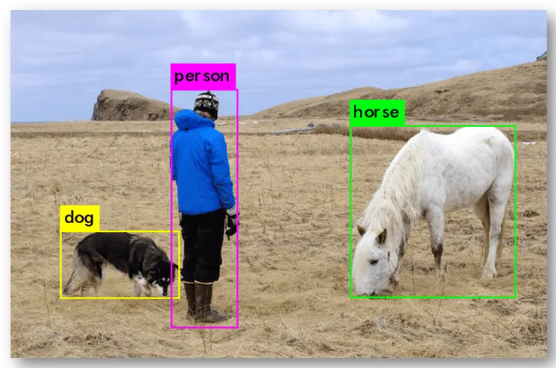

# YOLO V4

Yolo v4 is designed as the fastest object detection for production systems also optimized for parallel computing. it results in fast computation and high accuracy. The reason why to use YOLO v4 is that it
1. Developed an efficient and powerful object detection
   model. It makes everyone can use a 1080 Ti or 2080 Ti
   GPU to train a super fast and accurate object detector.
2. Verified the influence of state of the art Bag of Freebies and Bag of Specials methods of object detection during the detector training.
3. Modified state of the art methods and make them
   more effecient and suitable for single GPU training,
   including CBN [89], PAN [49], SAM [85], etc.
   
Paper link https://arxiv.org/pdf/1506.02640v5.pdf

## Architecture

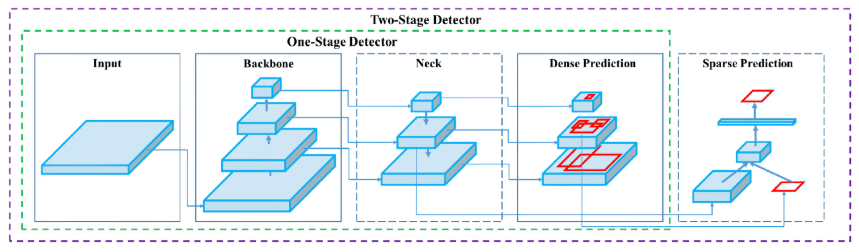

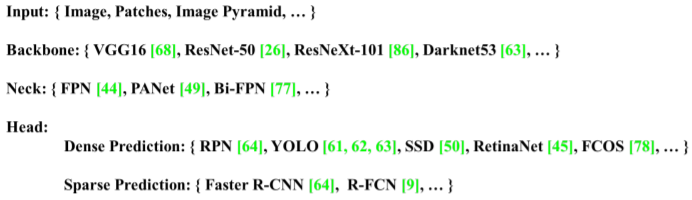


## Bag of freebies

The main idea is to gain more accuracy without cost which is achieved by the effective use of methods. Different types of Data Augumentation techniques are being used. The following are the methods used in BOF:<br>
- Cutmix and Mosaic data augmentations,
- Dropblock regularization
- Class label Smoothing 







## Bag of specials

The bag of specials refers to something whicg could be gained for cheap or discount. Analogously the set of modules that only increase the inference cost by a small amount but significantly improve the accuracy of object detection, are call “bag of specials”.The BoS includes:
- Mish activation
- Cross-stage partial connections (CSP)
- Multiinput weighted residual connections (MiWRC)
- SPP-block, SAM-block,
- PAN path-aggregation block,
- DIoU-NMS

## Selection of Architecture

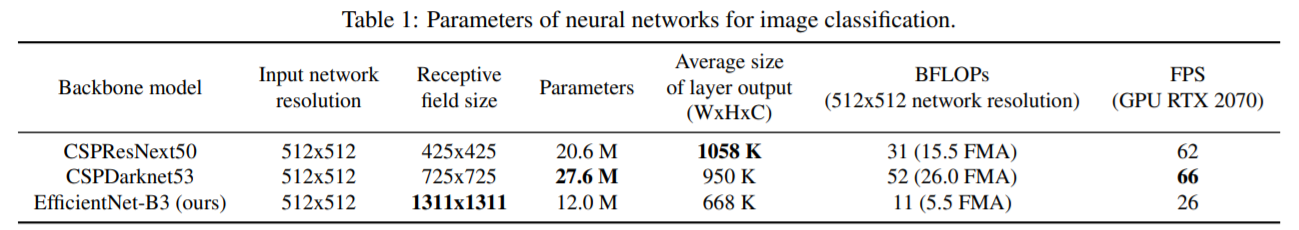

The main objective is to find the optimal balance among the input network resolution, the conventional layer number, the parameter number and number of filters. Hence it could said as proper selection of BoF and BoS parameters.

A reference model which is optimal for classification is
not always optimal for a detector. In contrast to the classifier, the detector requires the following:
- Higher input network size (resolution) – for detecting
  multiple small-sized objects
- More layers – for a higher receptive field to cover the
  increased size of input network
- More parameters – for greater capacity of a model to
  detect multiple objects of different sizes in a single image


### Backbone


From the above table it is clear that the model **CSPDarknet53** works better as comapred with **CSPResNext50** in object classification of imageNet.  However, conversely, the **CSPDarknet53** is
better compared to **CSPResNext50** in terms of detecting objects on the MS COCO dataset.

### Neck

We add the SPP block over the CSPDarknet53, since it
significantly increases the receptive field, separates out the
most significant context features and causes almost no reduction of the network operation speed. We use PANet as
the method of parameter aggregation from different backbone levels for different detector levels, instead of the FPN
used in YOLOv3
    

### Head

WFinally, we choose CSPDarknet53 backbone, SPP additional module, PANet path-aggregation neck, and YOLOv3
(anchor based) head as the architecture of YOLOv4.

## Selection of BoF and BoS

For improving the object detection training, a CNN usually uses the following:
- Activations: ReLU, leaky-ReLU, parametric-ReLU,
  ReLU6, SELU, Swish, or Mish
- Bounding box regression loss: MSE, IoU, GIoU,
  CIoU, DIoU
- Data augmentation: CutOut, MixUp, CutMix
- Regularization method: DropOut, DropPath [36],
  Spatial DropOut [79], or DropBlock
- Normalization of the network activations by their
  mean and variance: Batch Normalization (BN) [32],
  Cross-GPU Batch Normalization (CGBN or SyncBN)
  [93], Filter Response Normalization (FRN) [70], or
  Cross-Iteration Batch Normalization (CBN) [89]
- Skip-connections: Residual connections, Weighted
  residual connections, Multi-input weighted residual
  connections, or Cross stage partial connections (CSP)

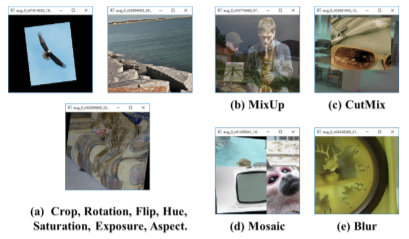

## Experimental Setup

The experiment was made upon both ImageNet and MSCOCO datasets using the GPU such as NVIDIA 1080 TI and 2080 TI.

### MS COCO Dataset

The COCO(Common objects in context) dataset is an excellent object detection dataset with 80 classes, 80,000 training images and 40,000 validation images. 
> Paper link https://arxiv.org/pdf/1405.0312.pdf

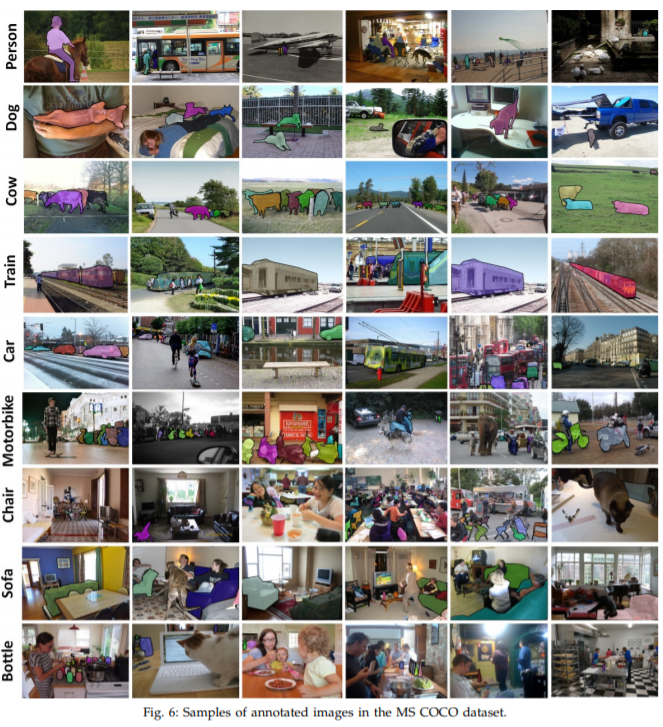

### Hyperparameters for ImageNet

- Training steps of 8 million
- Batch and mini batch size of 128 and 32 respectively
- Learning rate of 0.1 using a polynomial decay learning rate scheduling strategy.
- Warm up steps of 1000, and
- Momentum and weight decay of 0.9 and 0.005 respectively

### Hyperparameters for MS COCO Dataset

- Training steps of 500,500
- Learning rate of 0.01 using a step decay learning rate scheduling strategy.
- These learning steps were multiplied by a factor of 0.1 at 400k steps and 450k steps respectively.
- Momentum and weight decay of 0.9 and 0.005 respectively.

## Experiment

Testing of different training improvement techniques on accuracy of the classifier on ImageNet
 dataset, and then on the accuracy of the
detector on MS COCO dataset.


### Influence of BoF

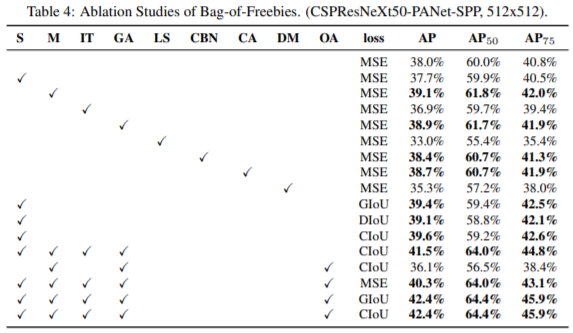

### Influence of BoS

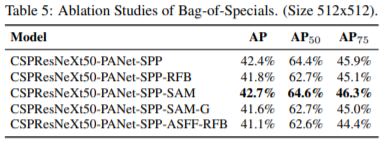

## The Model

### YOLO v4 model

- Backbone: CSPDarknet53 [81]
- Neck: SPP [25], PAN [49]
- Head: YOLOv3 [63]


### Yolo v4 uses


- Bag of Freebies (BoF) for backbone: CutMix and
  Mosaic data augmentation, DropBlock regularization,
  Class label smoothing
- Bag of Specials (BoS) for backbone: Mish activation, Cross-stage partial connections (CSP), Multiinput weighted residual     connections (MiWRC)
- Bag of Freebies (BoF) for detector: CIoU-loss,
  CmBN, DropBlock regularization, Mosaic data augmentation, Self-Adversarial Training, Eliminate grid
  sensitivity, Using multiple anchors for a single ground
  truth, Cosine annealing scheduler [52], Optimal hyperparameters, Random training shapes
- Bag of Specials (BoS) for detector: Mish activation,
  SPP-block, SAM-block, PAN path-aggregation block,
  DIoU-NMS


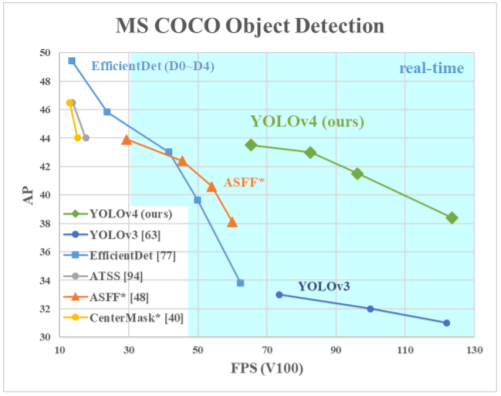

## Result

The architecture is compared with other state of art  using different GPU'S like Maxwell, Pascal and Volta. The GPU'S used are:
- GTX Titan X (Maxwell) or Tesla M40 GPU
- Titan X (Pascal), Titan Xp, GTX 1080 Ti, or Tesla P100 GPU
- Titan Volta or Tesla V100 GPU

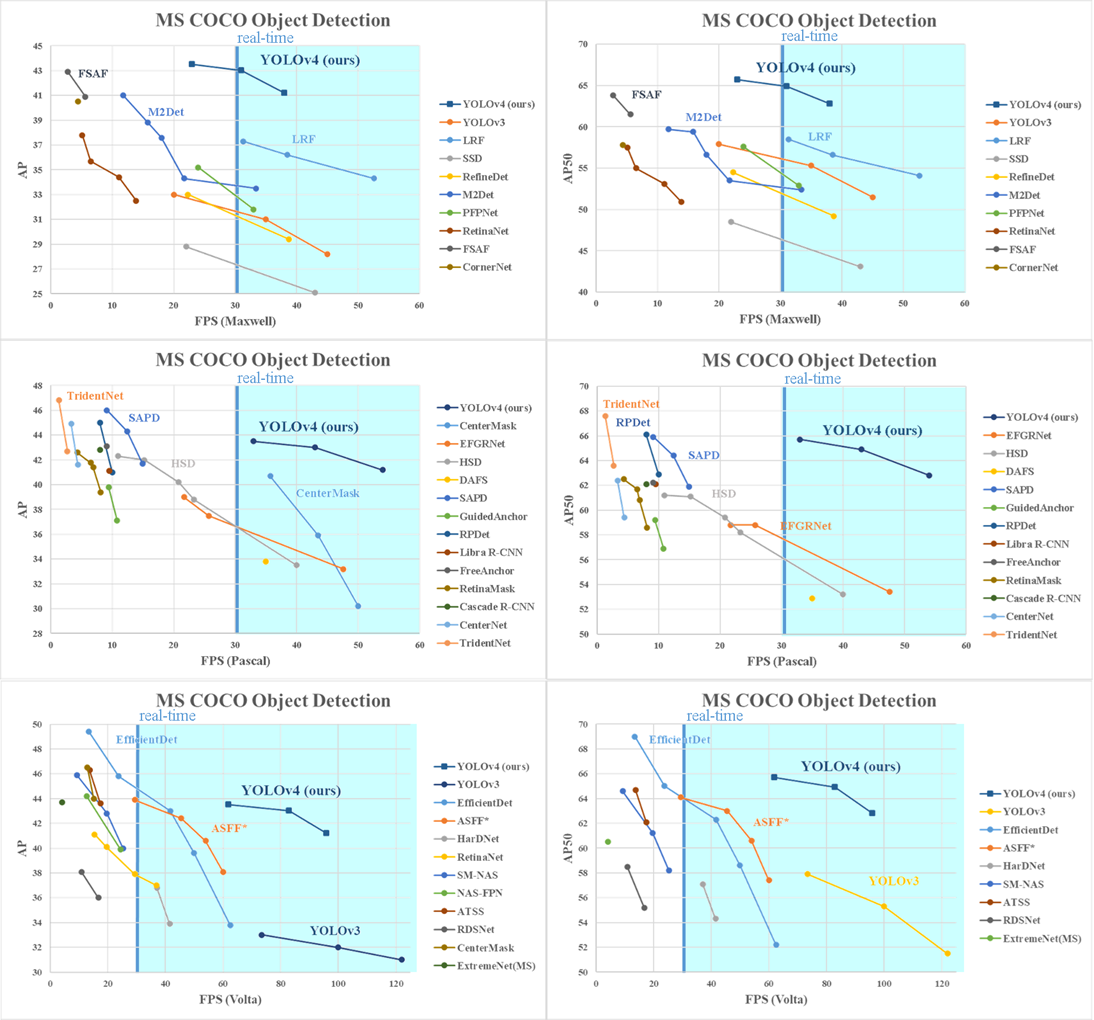